In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# Sequential 모델

In [4]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.build(input_shape=(None, 3))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation='relu', name='my_first_layer'))
model.add(layers.Dense(10, activation='softmax', name='my_last_layer'))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_first_layer (Dense)       (None, 64)                256       
_________________________________________________________________
my_last_layer (Dense)        (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### 모델 선정 이유
Sequential 모델 생성 방법을 익히기 위해 간단한 Dense Layer 실습
#### Metrics 선정 이유
output 10개를 가정하여 softmax 사용
#### Loss 선정 이유
모델 생성 실습으로 Loss 미선정
#### 데이터 분할
모델 생성 실습으로 데이터 미사용
#### 하이퍼 파라미터 조정
모델 생성 실습으로 하이퍼 파라미터 미사용
#### 시각화
model.summary()를 통한 Layer 시각화
#### 실험 결과 기록
각 모델 별 model.summary()를 통해 결과 확인  

---

# Functional API 모델

In [15]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 다중 입력, 다중 출력 함수형 모델

vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [28]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 10000)]      0                                            
__________________________________________________________________________________________________
text_body (InputLayer)          [(None, 10000)]      0                                            
__________________________________________________________________________________________________
tags (InputLayer)               [(None, 100)]        0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 20100)        0           title[0][0]                      
                                                                 text_body[0][0]            

In [30]:
# 입력과 타깃 배열 리스트를 전달하여 모델 훈련하기

import numpy as np

num_samples = 1280

# 더미 입력 데이터
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# 더미 타깃 데이터
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 8ms/step - loss: 15.5748 - priority_loss: 0.3394 - department_loss: 15.2354 - priority_mean_absolute_error: 0.5056 - department_accuracy: 0.2273


In [31]:
# 입력과 타깃 배열을 딕셔러니를 전달하여 모델 훈련하기

model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})

model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)

model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 1s 8ms/step - loss: 36.7386 - priority_loss: 0.3394 - department_loss: 36.3992 - priority_mean_absolute_error: 0.5056 - department_accuracy: 0.1594


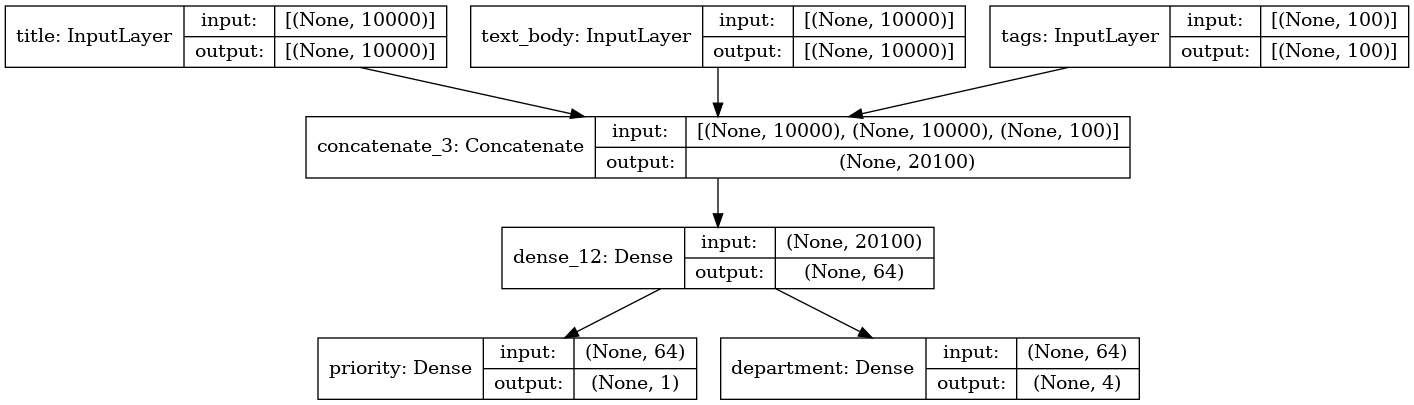

In [34]:
keras.utils.plot_model(model, show_shapes=True)

In [35]:
model.layers

In [36]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [37]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_3')>

In [38]:
# 중간층의 출력을 재사용해서 새로운 모델 만들기

features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

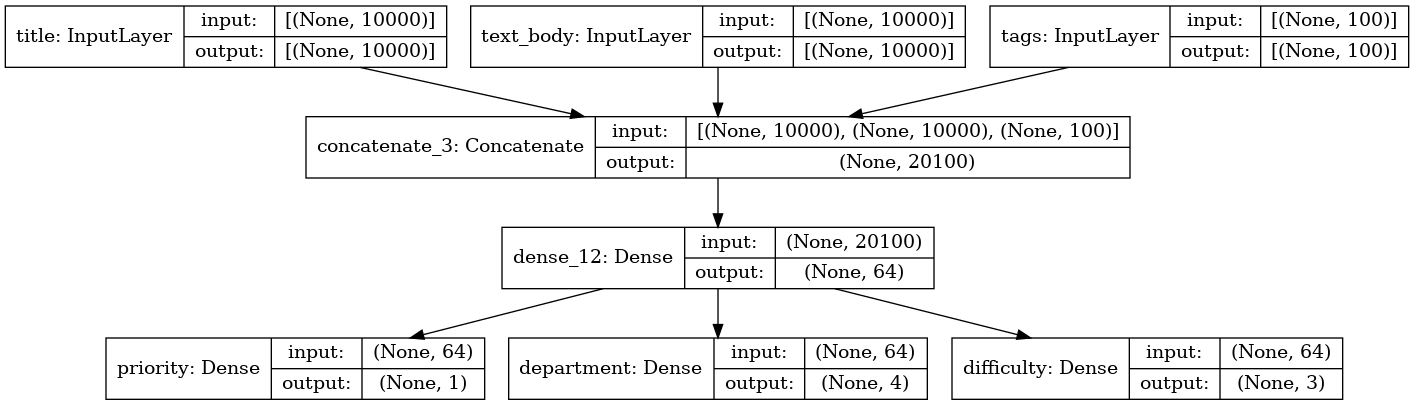

In [39]:
keras.utils.plot_model(new_model, show_shapes=True)

#### 모델 선정 이유
Functional 모델 생성 방법을 익히기 위해 다중 입력, 다중 출력 모델 구성
#### Metrics 선정 이유
random 데이터에 대한 모델 실습으로 간단한 metrics 사용   
"priority": "mean_absolute_error" -> mae, mse, rmse 모두 사용가능   
"department": "accuracy"

#### Loss 선정 이유
"priority": "mean_squared_error" -> 실수형 변수  
"department": "categorical_crossentropy" -> 다중 카테고리 타겟  
"difficulty": "softmax" -> 3개의 클래스 분류  
  
#### 데이터 분할
모델 생성 실습으로 랜덤 더미 데이터 사용
#### 하이퍼 파라미터 조정
모델 생성 실습으로 하이퍼 파라미터 미조정
#### 시각화
model.summary(), keras.utils.plot_model()을 통한 Layer 시각화
#### 실험 결과 기록
각 모델 별 model.summary(), plot_model()을 통해 결과 확인  

---

# Subclassing 모델

In [40]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [41]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [42]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 1s 8ms/step - loss: 20.7993 - output_1_loss: 0.3283 - output_2_loss: 20.4710 - output_1_mean_absolute_error: 0.4944 - output_2_accuracy: 0.5750


Model 서브클래싱 워크플로는 모델을 만드는 가장 유연한 방법이다.  
층의 유향 비순환 그래프(directed acyclic graph)로 표현할 수 없는 모델을 만들 수 있다.  
  예시) call() 메소드가 for 루프 안에서 층을 사용하거나 재귀적으로 호출하는 모델  
  
하지만 잠재적인 오류 가능성이 훨씬 커서 결과적으로 더 많은 디버깅 작업을 해야한다.  
함수형 모델을 명시적인 데이터 구조인 층의 그래프이므로 출력하고 조사하고 수정할 수 있지만  
서브클래싱 모델은 원시코드가 담긴 call() 메서드를 가진 파이썬 클래스이다.  
층이 서로 연결되는 방식이 call() 메서드 안에 감추어져 이 정보를 활용할 수 없다.  
즉, summary()나 plot_model() 함수로 모델의 구조를 그릴 수 없다.  

# 혼합 모델

In [43]:
# 서브클래싱한 모델을 포함하는 함수형 모델 만들기

class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [45]:
# 함수형 모델을 포함하는 서브클래싱 모델 만들기

inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

# 내장된 훈련 루프와 평가 루프 사용하기

In [46]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2953 - accuracy: 0.9130 - val_loss: 0.1486 - val_accuracy: 0.9570
Epoch 2/3
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1657 - accuracy: 0.9528 - val_loss: 0.1212 - val_accuracy: 0.9674
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9725


## 사용자 정의 지표 만들기

In [47]:
# Metric 클래스를 상속하여 사용자 정의 지표 구현하기

import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    # 현재 지표 값 반환
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    # 객체를 다시 생성하지 않고 상태를 초기화 하는 방법
    # 이렇게 함으로써 지표 객체 하나를 서로 다른 훈련 반복에 사용하거나 훈련과 평가에 모두 사용할 수 있음
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [48]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2917 - accuracy: 0.9124 - rmse: 7.1833 - val_loss: 0.1721 - val_accuracy: 0.9531 - val_rmse: 7.3596
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1643 - accuracy: 0.9545 - rmse: 7.3563 - val_loss: 0.1238 - val_accuracy: 0.9670 - val_rmse: 7.4000
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1088 - accuracy: 0.9727 - rmse: 7.4393


## 콜백 사용하기

### 콜백을 사용하는 몇 가지 사례  
1. 모델 체크포인트 저장 : 훈련 중 특정 지점에서 모델의 현재 가중치 저장  
2. 조기 종료 : 검증 손실이 더이상 향상되지 않을때 가장 좋은 모델 저장하고 훈련 중지  
3. 훈련하는 동안 하이퍼파라미터 값을 동적으로 조정(ex. learning rate)  
4. 훈련과 검증 지표를 로그에 기록하거나 모델이 학습한 표현이 업데이트 될때마다 시각화  

In [50]:
# fit() 메서드에서 callbacks 매개변수 사용하기

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.h5",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2958 - accuracy: 0.9120 - val_loss: 0.1724 - val_accuracy: 0.9527
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1650 - accuracy: 0.9541 - val_loss: 0.1297 - val_accuracy: 0.9657
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1381 - accuracy: 0.9624 - val_loss: 0.1102 - val_accuracy: 0.9703
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1250 - accuracy: 0.9677 - val_loss: 0.1068 - val_accuracy: 0.9747
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1143 - accuracy: 0.9719 - val_loss: 0.1060 - val_accuracy: 0.9751
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1065 - accuracy: 0.9736 - val_loss: 0.1097 - val_accuracy: 0.9756
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1051 - accuracy: 0.9757 - val_loss: 0.1010 - val_ac

In [51]:
model = keras.models.load_model("checkpoint_path.h5")

In [53]:
model.evaluate(val_images, val_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9763


[0.10096320509910583, 0.9763000011444092]

## 사용자 정의 콜백 만들기

에포크 시작/끝날 때 호출  
on_epoch_begin(epoch, logs)  
on_epoch_end(epoch, logs)  
  
각 배치 처리가 시작하기 전/끝난 후 호출  
on_batch_begin(batch, logs)  
on_batch_end(batch, logs)  
  
훈련이 시작/끝날 때 호출  
on_train_begin(logs)  
on_train_end(logs)

In [56]:
# Callback 클래스를 상속하여 사용자 정의 콜백 만들기

from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2901 - accuracy: 0.9136 - val_loss: 0.1467 - val_accuracy: 0.9575
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1676 - accuracy: 0.9523 - val_loss: 0.1268 - val_accuracy: 0.9655
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1389 - accuracy: 0.9626 - val_loss: 0.1081 - val_accuracy: 0.9731
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1290 - accuracy: 0.9658 - val_loss: 0.1114 - val_accuracy: 0.9725
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1182 - accuracy: 0.9705 - val_loss: 0.1085 - val_accuracy: 0.9754
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1126 - accuracy: 0.9737 - val_loss: 0.1158 - val_accuracy: 0.9732
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1079 - accuracy: 0.9742 - val_loss: 0.1205 - val_ac

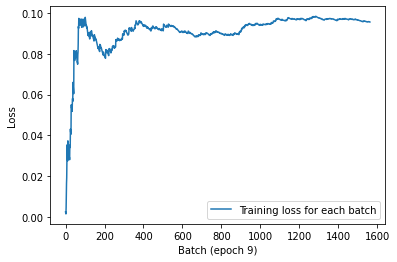

In [57]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

## 텐서보드를 사용한 모니터링과 시각화

In [58]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tb_logs",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2926 - accuracy: 0.9141 - val_loss: 0.1502 - val_accuracy: 0.9561
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1622 - accuracy: 0.9545 - val_loss: 0.1212 - val_accuracy: 0.9650
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1372 - accuracy: 0.9629 - val_loss: 0.1093 - val_accuracy: 0.9721
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1241 - accuracy: 0.9672 - val_loss: 0.1068 - val_accuracy: 0.9745
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1172 - accuracy: 0.9707 - val_loss: 0.1080 - val_accuracy: 0.9760
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1093 - accuracy: 0.9735 - val_loss: 0.1123 - val_accuracy: 0.9739
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1017 - accuracy: 0.9754 - val_loss: 0.1042 - val_ac

In [59]:
%load_ext tensorboard
%tensorboard --logdir ./tb_logs

# <조별특별미션> 사용자 정의 훈련, 평가 루프 만들기 

In [60]:
# 측정 지표의 저수준 사용법

metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"결과: {current_result:.2f}")

결과: 1.00


In [61]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"평균 지표: {mean_tracker.result():.2f}")

평균 지표: 2.00


In [62]:
# 코드 7-21. 단계별 훈련 루프 작성하기: 훈련 스텝 함수

model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

# fit() 함수 구현
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

In [63]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [64]:
# 코드 7-23. 단계별 훈련 루프 작성하기: 훈련 루프 자체

training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9158
...loss: 0.2901
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9525
...loss: 0.1683
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9620
...loss: 0.1391


In [65]:
# tf.function으로 성능 높이기
# 평가 스텝 함수에 @tf.function 데코레이터 추가하기
# 텐서플로 코드는 기본적으로 즉시 실행(eager excution) 단위로 코드가 실행되서 성능 측면에서 최적이 아님
# 데코레이터 추가하여 계산 그래프(computation graph)로 컴파일 하여 전역적인 최적화 가능

# evaluate() 함수 구현
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9678
...val_loss: 0.1248


## fit() 메서드를 사용자 정의 루프로 활용하기

In [66]:
# fit()이 사용할 사용자 정의 훈련 스텝 구현하기

loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [67]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2933
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1646
Epoch 3/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1391


In [68]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [69]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2931 - sparse_categorical_accuracy: 0.9121
Epoch 2/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1649 - sparse_categorical_accuracy: 0.9532
Epoch 3/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1393 - sparse_categorical_accuracy: 0.9625


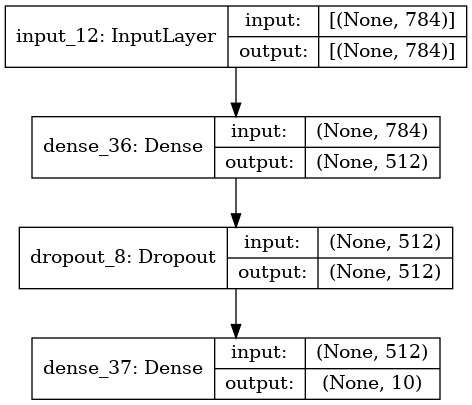

In [70]:
keras.utils.plot_model(model, show_shapes=True)

# 플레이그라운드
## - (6조 M2 공유) Image Data :Layer의 구성이 달라지는 경우 2
* 레이어 깊이에 변화가 있는 경우
* Conv-maxpool을 한번 반복하는 경우 // Conv-maxpool을 여러 번 반복하는 경우

---

In [ ]:
# Conv-MaxPool 1번 반복

import datetime
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Fashion MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# 픽셀 값을 0-1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# CNN 모델 생성
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
start = datetime.datetime.now()
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))#, callbacks=[early_stop])
end = datetime.datetime.now()
training_time = end - start

# 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.legend(loc='upper right')
plt.title('Model Loss')

plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')
print(f'학습 시간 : {training_time}')

Epoch 1/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.4528 - accuracy: 0.8353 - val_loss: 0.3495 - val_accuracy: 0.8706
Epoch 2/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2983 - accuracy: 0.8910 - val_loss: 0.3356 - val_accuracy: 0.8755
Epoch 3/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2559 - accuracy: 0.9052 - val_loss: 0.2808 - val_accuracy: 0.8965
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2206 - accuracy: 0.9178 - val_loss: 0.2707 - val_accuracy: 0.9021
Epoch 5/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1945 - accuracy: 0.9274 - val_loss: 0.2660 - val_accuracy: 0.9036
Epoch 6/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1736 - accuracy: 0.9349 - val_loss: 0.2810 - val_accuracy: 0.8988
Epoch 7/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1548 - accuracy: 0.9423 - val_loss: 0.2749 -

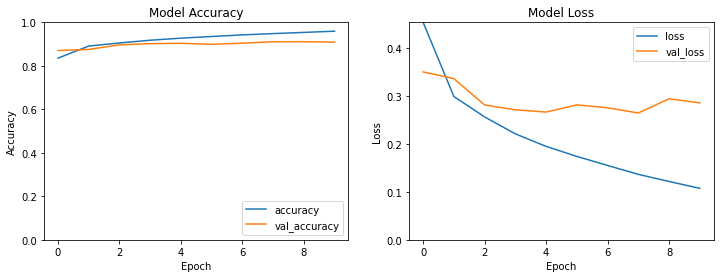

313/313 - 3s - loss: 0.2851 - accuracy: 0.9089

Test accuracy: 0.9089000225067139
학습 시간 : 0:11:22.687051


In [3]:
# Conv-MaxPool 2번 반복

import datetime
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Fashion MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# 픽셀 값을 0-1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# CNN 모델 생성
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
start = datetime.datetime.now()
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))#, callbacks=[early_stop])
end = datetime.datetime.now()
training_time = end - start

# 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.legend(loc='upper right')
plt.title('Model Loss')

plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')
print(f'학습 시간 : {training_time}')

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.5801 - accuracy: 0.7865 - val_loss: 0.4548 - val_accuracy: 0.8365
Epoch 2/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.3847 - accuracy: 0.8589 - val_loss: 0.3811 - val_accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3280 - accuracy: 0.8785 - val_loss: 0.3478 - val_accuracy: 0.8702
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2919 - accuracy: 0.8917 - val_loss: 0.3195 - val_accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2604 - accuracy: 0.9033 - val_loss: 0.3137 - val_accuracy: 0.8857
Epoch 6/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2389 - accuracy: 0.9108 - val_loss: 0.3224 - val_accuracy: 0.8856
Epoch 7/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2166 - accuracy: 0.9184 - val_loss: 0.3291 -

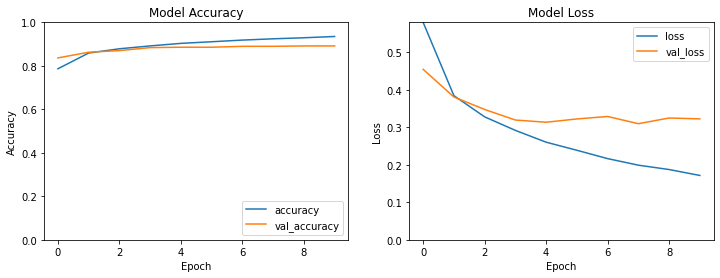

313/313 - 3s - loss: 0.3227 - accuracy: 0.8915

Test accuracy: 0.8914999961853027
학습 시간 : 0:11:40.626427


In [1]:
# Conv-MaxPool 3번 반복

import datetime
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Fashion MNIST 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# 픽셀 값을 0-1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# CNN 모델 생성
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
start = datetime.datetime.now()
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))#, callbacks=[early_stop])
end = datetime.datetime.now()
training_time = end - start

# 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss']))])
plt.legend(loc='upper right')
plt.title('Model Loss')

plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')
print(f'학습 시간 : {training_time}')

# 회고

## 케창딥 7장

내가 원하는 모델을 만드려면 결국 Functional API와 서브클래싱 모델의 혼합모델, 사용자 정의 훈련, 평가 루프를 만드는 것이 필수가 될 것 같다.  

원하는 모델 구조를 그리고 훈련, 평가 루프를 구현하는 연습을 해야겠다.  

 * 추가 공부할 내용
   - clas MyModel(keras.Model): 구현 연습  
   - 유용한 decorator 공부


## 플레이 그라운드

실험 전 가정한 시나리오는 Conv. Layer가 추가될 수록 성능이 향상되고, 학습 시간이 길어지는 것이었다.

하지만 데이터셋이 단순해서 Convolutional Layer를 중첩했을 때 오버피팅만 되고 큰 이점이 없었던 것으로 생각되어 아쉬웠다.

처음에 데이터셋 선정과 기본으로 사용한 모델의 구조를 더 신중하게 정했어야 했다.

Dropout 등의 오버피팅 방지를 위한 장치가 없었던 것도 validation accuracy의 진전이 없었던 이유인 것 같다.

추가 실험으로 조금 더 복잡한 데이터셋으로 Dropout Layer을 추가하여 진행하면 유의미한 결과를 얻을 수 있을 것 같다.

Convolutional Layer를 중첩할 때는 필터를 32, 64, 128로 점차 사이즈를 키웠는데 레이어가 깊어질 수 록 필터의 개수가 많아야

이미지의 구체적인 부분까지 학습이 가능해서 이런 식으로 레이어를 구성한 다는 것을 새로 알게되었다.